# Оболочка полилинии
Простой полилинией называется ломаная не имеющая самопересечений.
Далее мы научимся строить выпуклую оболочку полилинии за $O(n)$
![Пример](images/polyline.png)



## Алгоритм Мелькмана

Заведем дек, в котором будут поддерживаться 2 инварианта:
1. Вершины в деке – это вершины корректной выпуклой оболочки для всех рассмотренных вершин.
2. Последняя рассмотренная вершина лежит спереди и сзади дека (если она принадлежит текущей
оболочке).
Изначально дек инициализируется первыми тремя вершинами полилинии (очевидно, корректно).
Далее идем по вершинам в том порядке, в котором они соединены полилинией и, в зависимости от положения очередной добавляемой точки, изменяем дек.

Пусть у нас была дана полилиния $P={p_1, p_2, \dots, p_9, \dots}$.
Пускай мы уже построили оболочку для вершин $p_1, p_2,\dots, p_8$. При добавлении очередной вершины $p_9$ возможны случаи:

![Пример](images/polyline_var.png)

Заметим, что добавляемая точка не может "спряться" от текущей головной вершины позади всей оболочки
из-за несамопересекаемости полилинии.

![Пример](images/polyline_no.png)

Как изменяется дек?
1. Если добавуляемая точка оказалась в позиции 4 (внутри текущей оболочки), то ничего делать ненадо. 
2. Если в позициях 1 или 3 – удаляем вершины с соответствующей стороны дека, пока не получится
корректный поворот.
3. В случае 2 удаляем по 1 вершине с обоих сторон дека.

В любом из случаев, в конце очередного шага необходимо положить эту вершину с обоих концов дека.

## Реализация

In [108]:
from utils import *
from examples import *
from collections import deque

def melkman(points):
    d = deque()
    if len(points) < 0:
        return d
    
    t = turn( points[1], points[0], points[2])
    if t == TURN_RIGHT:
        d.append(points[0])
        d.append(points[1])
    else :
        d.append(points[1])
        d.append(points[0])
    
    d.append(points[2])
    d.appendleft(points[2])
    print(d)
    for i in  range(3, len(points)):
        l = len(d)
        print(points[i])
        if turn(d[0], points[i], d[1]) == TURN_RIGHT and turn(d[l - 1], d[l - 2], points[i]) == TURN_RIGHT:
            continue
        while turn(d[l - 1], d[l - 2], points[i]) != TURN_RIGHT:
            d.pop()
            l -= 1
        d.append(points[i])
        while turn(d[0], points[i], d[1]) != TURN_RIGHT:
            d.popleft() 
        d.appendleft(points[i])
        print(d)
    return d


In [109]:
# N = 50
# x = np.random.rand(N)
# y = np.random.rand(N)

points = example1
ch = list(melkman(points))
print(ch)

deque([[7.0, 3.0], [5.0, 1.0], [5.0, 0.0], [7.0, 3.0]])
[4.0, 4.0]
deque([[4.0, 4.0], [5.0, 0.0], [7.0, 3.0], [4.0, 4.0]])
[4.5, 3.0]
[1.0, 7.0]
deque([[1.0, 7.0], [5.0, 0.0], [7.0, 3.0], [1.0, 7.0]])
[[1.0, 7.0], [5.0, 0.0], [7.0, 3.0], [1.0, 7.0]]


[1.0, 5.0, 7.0, 1.0]
[7.0, 0.0, 3.0, 7.0]


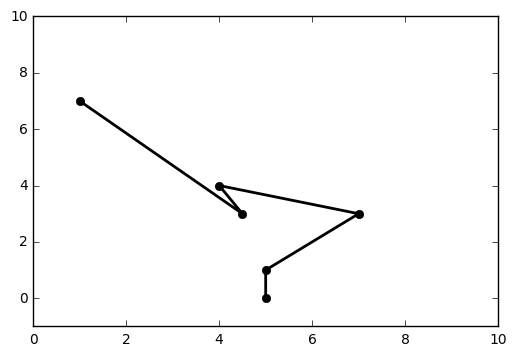

In [113]:


xs = [x[0] for x in points]
ys = [y[1] for y in points]

plt.plot(xs, ys, 'o-', color='black', linewidth=2)

x = [x[0] for x in ch]
y = [x[1] for x in ch]
print(x)
print(y)
#plt.plot(x, y, 'k-', color='#00ff00', linewidth=3)
#plt.plot(x, y, 'o', color='red', markersize=8)
plt.axis([0, 10, -1, 10])
plt.show()

## Корректность и время работы
Очевидно, что этот алгоритм работает за линейное время от количества точек в исходной полилинии, поскольку каждая вершина будет обработана (добавлена и удалена) один раз. 

Но почему алгоритм вообще работает? Для того, чтобы объяснить это, для начала вспомним свойства выпуклой оболочки $H$ для простой полигональной цепи $P$.
1. $H$ выпуклая
2. $P$ содержится в  $P$
3. Множество вершин, из которых состоит $H$ является подмножеством вершин полигональной цепи $P$

Доказательство корректности проводится по индукции, исходя из того, что следующая гипотеза верна каждый раз, когда мы рассматриваем очередную вершину.

ГИПОТЕЗА 


